In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

2025-06-05 13:49:38.212052: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749131378.401834      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749131378.456945      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
img_size = (224, 224)
batch_size = 32
base_dir = '/kaggle/input/dog-and-cat-classification-dataset/PetImages'

In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze the base model

I0000 00:00:1749131426.584994      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749131426.585721      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification: dog vs cat
])

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1749131448.325416     113 service.cc:148] XLA service 0x7de2c4004cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749131448.326133     113 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749131448.326150     113 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749131449.222043     113 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1749131453.174469     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 - 186s - 298ms/step - accuracy: 0.9729 - loss: 0.0788 - val_accuracy: 0.9810 - val_loss: 0.0487
Epoch 2/5
625/625 - 64s - 103ms/step - accuracy: 0.9837 - loss: 0.0460 - val_accuracy: 0.9832 - val_loss: 0.0444
Epoch 3/5
625/625 - 65s - 104ms/step - accuracy: 0.9851 - loss: 0.0405 - val_accuracy: 0.9844 - val_loss: 0.0445
Epoch 4/5
625/625 - 65s - 104ms/step - accuracy: 0.9863 - loss: 0.0372 - val_accuracy: 0.9844 - val_loss: 0.0434
Epoch 5/5
625/625 - 63s - 101ms/step - accuracy: 0.9876 - loss: 0.0341 - val_accuracy: 0.9848 - val_loss: 0.0431


In [31]:
# Unfreeze the last 30 layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # small LR avoids wrecking pre-trained weights
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=2
)

In [10]:
loss, accuracy = model.evaluate(val_generator, verbose=2)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

157/157 - 23s - 148ms/step - accuracy: 0.9848 - loss: 0.0431
Validation Loss: 0.0431
Validation Accuracy: 0.9848


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Confusion Matrix (1 batch only):
[[15  0]
 [ 0 17]]

Classification Report:
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00        15
         Dog       1.00      1.00      1.00        17

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



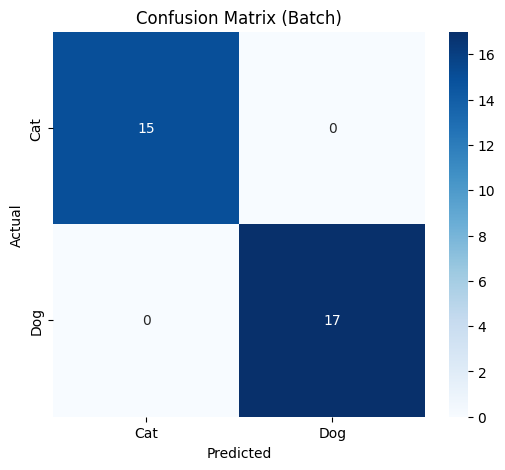

In [11]:
# Get a batch of validation data (no shuffle)
val_generator.reset()
X_val_batch, y_val_batch = next(val_generator)

# Get predictions
y_pred_batch = model.predict(X_val_batch)
y_pred_binary = (y_pred_batch > 0.5).astype(int).reshape(-1)

# Confusion matrix on this batch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val_batch, y_pred_binary)

print("Confusion Matrix (1 batch only):")
print(cm)

print("\nClassification Report:")
print(classification_report(y_val_batch, y_pred_binary, target_names=["Cat", "Dog"]))

# Plot it
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Batch)")
plt.show()

In [12]:
!pip install -q gradio

import gradio as gr
import numpy as np
import tensorflow as tf

# Use TensorFlow/Keras resize for safer preprocessing
def predict_cat_dog(img):
    # Ensure image is RGB and in correct shape
    img = tf.image.resize(img, [224, 224])       # Resize to model's expected input
    img = tf.cast(img, tf.float32) / 255.0       # Normalize
    img = tf.expand_dims(img, axis=0)            # Add batch dimension

    # Predict
    prediction = model.predict(img)[0][0]

    # Interpret prediction
    return "Prediction: Dog" if prediction > 0.5 else "Prediction: Cat"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_cat_dog,
    inputs=gr.Image(type="numpy"),     # Gradio sends image as NumPy array
    outputs="text",
    title="Cat and Dog Image Classifier",
    description="Upload an image to classify it as a cat or a dog."
)

# Launch
iface.launch(inline=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 99.6 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.7 MB/s eta 0:00:00
* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://35241d03953a868f56.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Huggi

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
